# **Computational Drug Discovery - Comparing Regressors Part 05**

khalid El Akri

['Chem Code Professor' YouTube channel](http://youtube.com/@chemcodeprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 05**, we will be comparing several Machine Learning algorithms for build regression models of coronavirus inhibitors.

## **1. Import libraries**

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
# install first Homebrew in your mac with this command in a new terminal
# /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"

In [ ]:
! brew install libomp

==> Fetching libomp
==> Downloading https://ghcr.io/v2/homebrew/core/libomp/manifests/16.0.4
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libomp/blobs/sha256:9263ad8503b
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################### 100.0%
==> Pouring libomp--16.0.4.ventura.bottle.tar.gz
==> Caveats
libomp is keg-only, which means it was not symlinked into /usr/local,
because it can override GCC headers and result in broken builds.

For compilers to find libomp you may need to set:
  export LDFLAGS="-L/usr/local/opt/libomp/lib"
  export CPPFLAGS="-I/usr/local/opt/libomp/include"
==> Summary
🍺  /usr/local/Cellar/libomp/16.0.4: 7 files, 1.7MB
==> Running `brew cleanup libomp`...
Disable this behaviour by setting HOMEBREW_NO_INSTALL_CLEANUP.
Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**

In [3]:
df = pd.read_csv('bioa_data_preprocessed1_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.14
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.03
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.87
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.88
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.97
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.00
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.94
131,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.97


In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [5]:
# Examin X dimension
X.shape

(133, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(133, 200)

In [7]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:18<00:00,  2.28it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:20<00:00,  2.01it/s]


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,46474180133659186491773923255394219990639686324...,-4204806773997735341723861155573738024155332290...,18997276150748988758693514718780066755443163136.00,0.18
KernelRidge,30.00,-25.24,4.75,0.03
QuantileRegressor,2.11,-0.00,0.93,0.62
LassoLars,2.11,0.00,0.93,0.04
DummyRegressor,2.11,0.00,0.93,0.03
Lasso,2.11,0.00,0.93,0.02
ElasticNet,2.09,0.01,0.92,0.02
LarsCV,1.62,0.44,0.69,0.50
PassiveAggressiveRegressor,1.32,0.71,0.50,0.05


In [10]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,13194427715995440507272020007622190786303966103...,-8830117009935409351265954406187811359894223342...,26079710708176464883245080277830827267504335114...,0.30
LinearRegression,5664843633397988352.00,-37910876623509610496.00,5403827209.82,0.04
TransformedTargetRegressor,5664843633397988352.00,-37910876623509610496.00,5403827209.82,0.02
KernelRidge,5.85,-31.48,5.00,0.02
GaussianProcessRegressor,2.80,-11.07,3.05,0.11
MLPRegressor,1.24,-0.60,1.11,0.24
LinearSVR,1.22,-0.48,1.07,0.09
Ridge,1.18,-0.20,0.96,0.03
PassiveAggressiveRegressor,1.18,-0.19,0.96,0.02


## **5. Data visualization of model performance**



[(0.0, 1.0)]

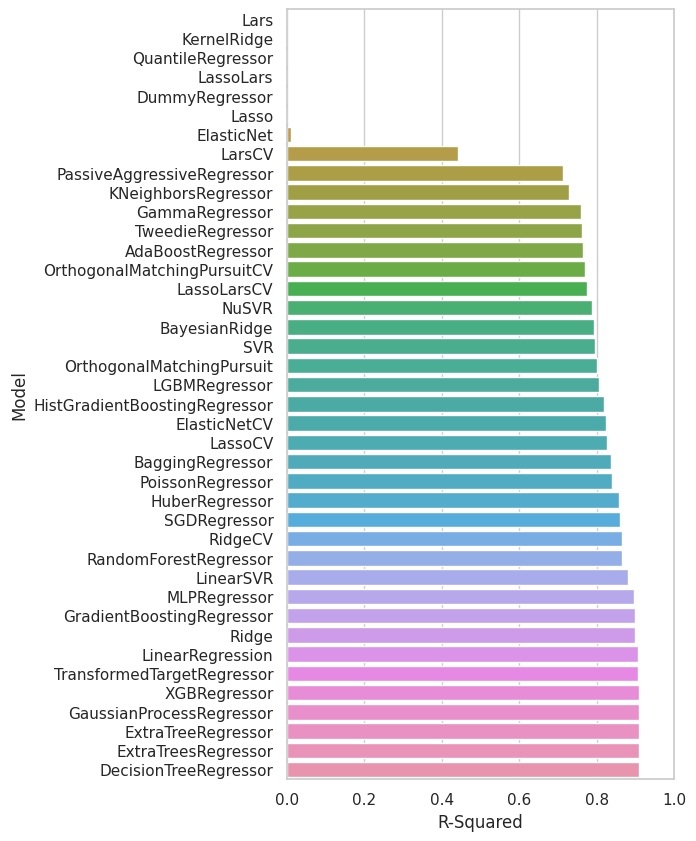

In [11]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

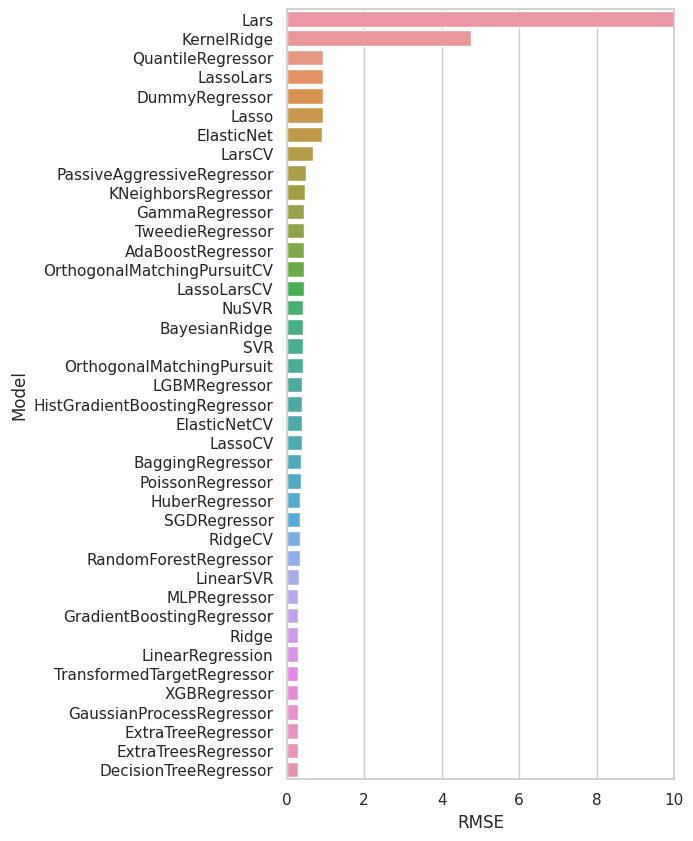

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

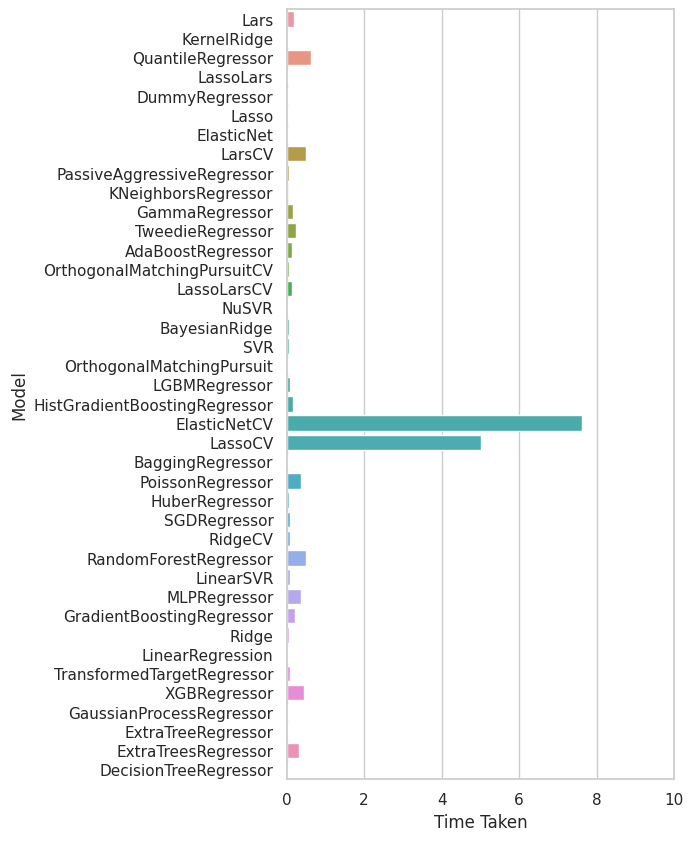

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))